# Machine Learning Classification Model

## Load the data

In [1]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Close,High,Low,Open,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,55.181129,55.696675,55.027373,55.443424,21220800,1.549137,UP
2016-12-09,56.049412,56.067501,55.289665,55.334887,27349400,0.321693,UP
2016-12-12,56.230301,56.347882,55.823296,55.913741,20198100,1.286142,UP
2016-12-13,56.962925,57.360886,56.293626,56.528784,35718900,-0.478631,DOWN
2016-12-14,56.691582,57.388017,56.555911,56.981009,30352700,-0.159803,DOWN
...,...,...,...,...,...,...,...
2025-02-27,392.529999,405.739990,392.170013,401.269989,21127400,1.123452,UP
2025-02-28,396.989990,397.630005,386.570007,392.660004,32845700,-2.187959,DOWN
2025-03-03,388.489990,398.820007,386.160004,398.820007,23007700,0.030878,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [3]:
target = df.change_tomorrow_direction
explanatory = df[['Open','High','Low','Close','Volume']]

### Compute the model

The following Python code will compute the numbers of the mathematical equation that we will use to calculate if the ticker goes UP or DOWN.

In [4]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=15)
model_dt.fit(explanatory, target)

DecisionTreeClassifier(max_depth=15)

### Visualize the model

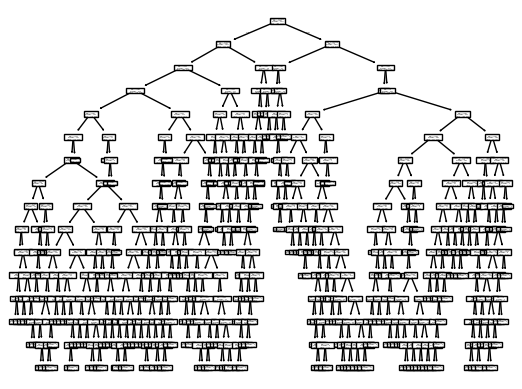

In [5]:
from sklearn.tree import plot_tree

plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_);

### Calculate the predictions

In [6]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,55.443424,55.696675,55.027373,55.181129,21220800
2016-12-09,55.334887,56.067501,55.289665,56.049412,27349400
2016-12-12,55.913741,56.347882,55.823296,56.230301,20198100
2016-12-13,56.528784,57.360886,56.293626,56.962925,35718900
2016-12-14,56.981009,57.388017,56.555911,56.691582,30352700
...,...,...,...,...,...
2025-02-27,401.269989,405.739990,392.170013,392.529999,21127400
2025-02-28,392.660004,397.630005,386.570007,396.989990,32845700
2025-03-03,398.820007,398.820007,386.160004,388.489990,23007700


In [7]:
y_pred = model_dt.predict(X=explanatory)
y_pred

array(['UP', 'UP', 'UP', ..., 'UP', 'UP', 'UP'],
      shape=(2070,), dtype=object)

In [8]:
df_predictions = df[['change_tomorrow_direction']].copy()
df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow_direction,prediction
Date,,
2016-12-08,UP,UP
2016-12-09,UP,UP
2016-12-12,UP,UP
2016-12-13,DOWN,DOWN
2016-12-14,DOWN,DOWN
...,...,...
2025-02-27,UP,UP
2025-02-28,DOWN,DOWN
2025-03-03,UP,UP


### Evaluate the model: compare predictions with the reality

In [9]:
comp = df_predictions.change_tomorrow_direction == df_predictions.prediction

In [10]:
comp.sum()

np.int64(1669)

In [11]:
len(comp)

2070

In [12]:
comp.sum()/len(comp)

np.float64(0.806280193236715)

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [13]:
import pickle

In [15]:
with open('models/model_dt_classification.pkl', 'wb') as f:
    pickle.dump(model_dt, f)